In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import pandas as pd

In [2]:
res_ht = [0.8, 0.71, 0.82, 0.70, 0.76, 0.87, 0.95, 0.81, 0.88, 0.8, 0.91, 0.78]

lp_base = '//media/ungzs10/F8426F05426EC7C8/Zsombi/MTA/ecog/trained_models/svm/HTNet_data/cikk/64_grid/'
lp_accs = 'accs_all.pkl'
lp_summ = 'accs_summary.txt'
res = pd.read_pickle(lp_base+lp_accs)

pats = list(res.keys())
trials = list(res[pats[0]])

No handles with labels found to put in legend.


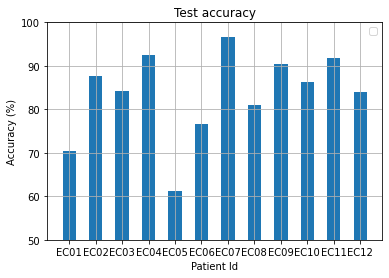

In [3]:
baseline_all = {'train':[], 'test':[]}
for patient in pats:
    baseline_temp = res[patient]['baseline']
    baseline_all["train"].append(baseline_temp[0]*100)
    baseline_all["test"].append(baseline_temp[1]*100)

x = np.arange(len(pats))  # the label locations
width = 0.50  # the width of the bars

plt.bar(x, baseline_all["test"], width)
plt.ylabel('Accuracy (%)')
plt.xlabel('Patient Id')
plt.title('Test accuracy')
plt.ylim((50,100))
plt.xticks(x, labels=pats)
plt.legend()
plt.grid()
# plt.savefig('figs/accs_all.png')
plt.show()

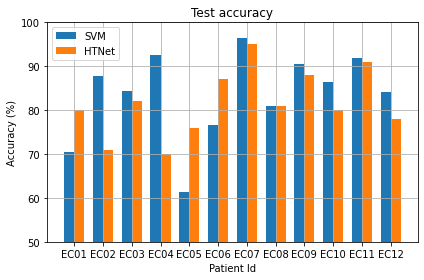

In [62]:
x = np.arange(len(pats))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, baseline_all['test'], width, label='SVM')
rects2 = ax.bar(x + width/2, [100*x for x in res_ht], width, label='HTNet')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
plt.ylabel('Accuracy (%)')
plt.xlabel('Patient Id')
plt.title('Test accuracy')
plt.ylim((50,100))
ax.set_xticklabels(pats)
ax.legend()
ax.grid()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.savefig('figs/svm_v_htnet')
plt.show()

In [5]:
def custom_plot(data, title):
    fig = plt.figure(figsize=(8,5))
    #fig.patch.set_facecolor('white')
    plt.imshow(data)

    ax = plt.gca()

    # Major ticks
    ax.set_xticks(np.arange(0, 8, 1))
    ax.set_yticks(np.arange(0, 8, 1))

    # Labels for major ticks
    ax.set_xticklabels(np.arange(1, 8+1, 1))
    ax.set_yticklabels(np.arange(1, 8+1, 1))

    # Minor ticks
    ax.set_xticks(np.arange(.5, 8, 1), minor=True)
    ax.set_yticks(np.arange(.5, 8, 1), minor=True)

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='silver', linestyle='--', linewidth=1)
    plt.title(title)
    plt.colorbar()
    plt.show()

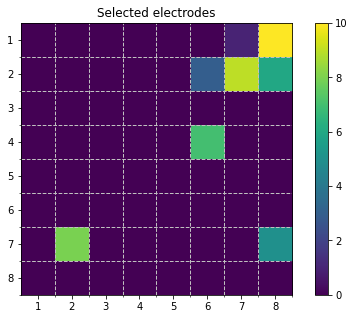

In [6]:
patient = 'EC12'

greedy = res[patient]['greedy']

channels = greedy[2]
ranges = greedy[3]

grid = np.zeros(64)

for i, channel in enumerate(channels):
    if channel>63:
        print('pass')
        continue
    grid[channel] = i+1


# plot grid
custom_plot(grid.reshape(8,8), 'Selected electrodes')

[16 10 16  5 18 32]


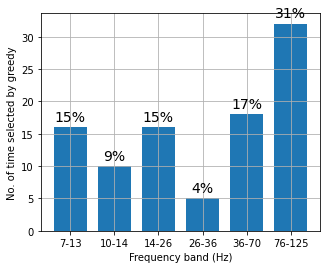

In [7]:
count_all = []

for patient in pats:
    greedy = res[patient]['greedy']
    channels = greedy[2]
    ranges = greedy[3]

    count_ranges = []
    for i in range(6):
        count_ranges.append(np.sum(np.asarray(ranges)==i))
    count_all.append(count_ranges)

    #print(patient)
    #plt.bar(np.arange(6), count_ranges)
    #plt.show()

summed_count_all = np.sum(np.asarray(count_all), axis=0)

print(summed_count_all)

fig = plt.figure(figsize=(5,4))
plt.bar(np.arange(6), summed_count_all, width=0.75)

for index, data in enumerate(summed_count_all):
    percent = int(np.sum(summed_count_all)*data*0.01)
    plt.text(x=index , y=data+1 , s=str(percent)+'%' , fontdict=dict(fontsize=14), ha='center')

plt.xticks(np.arange(6), labels=['7-13', '10-14', '14-26', '26-36', '36-70', '76-125'])
plt.xlabel('Frequency band (Hz)')
plt.ylabel('No. of time selected by greedy')
plt.grid()
plt.show()

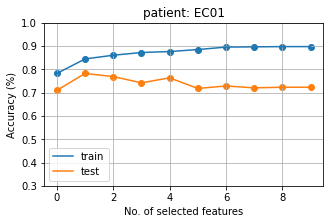

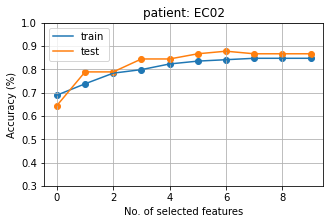

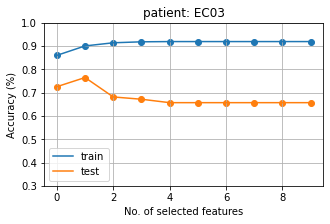

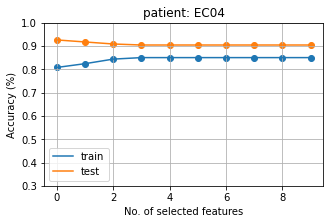

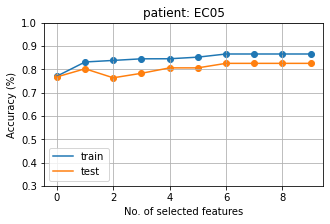

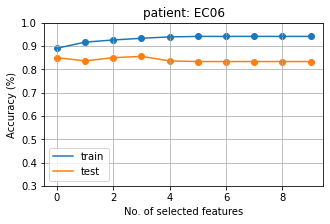

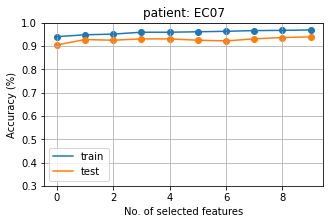

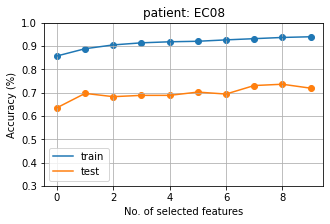

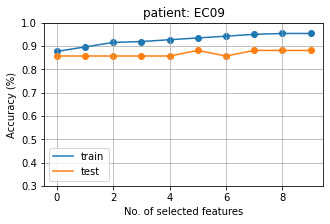

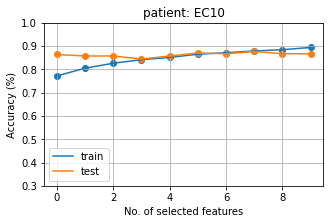

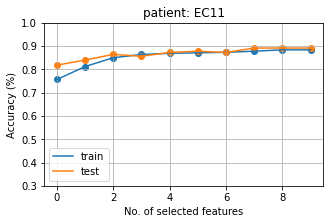

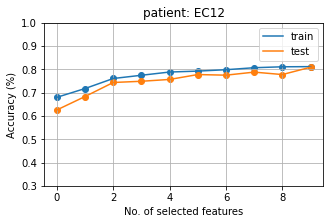

In [61]:
for patient in pats:
    greedy = res[patient]['greedy']

    fig = plt.figure(figsize=(5,3))

    plt.scatter(np.arange(len(greedy[0])), greedy[0])
    plt.plot(greedy[0], label='train')

    plt.scatter(np.arange(len(greedy[0])), greedy[1])
    plt.plot(greedy[1], label='test')

    plt.legend()
    plt.ylim((0.3, 1))
    plt.title('patient: {}'.format(patient))
    plt.xlabel('No. of selected features')
    plt.ylabel('Accuracy (%)')

    plt.grid()
    plt.savefig('figs/del/{}_greedy.png'.format(patient))
    plt.show()

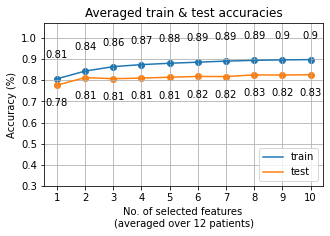

In [60]:
sum_accs_train = []
sum_accs_test = []

for patient in pats:
    greedy = res[patient]['greedy']

    greedy_train_temp = greedy[0]
    greedy_test_temp = greedy[1]

    while len(greedy[0]) < 10:
        greedy_train_temp.append(greedy_train_temp[-1])
        greedy_test_temp.append(greedy_test_temp[-1])

    sum_accs_train.append(greedy_train_temp)
    sum_accs_test.append(greedy_test_temp)

accs_train = np.mean(np.asarray(sum_accs_train), axis=0)
accs_test = np.mean(np.asarray(sum_accs_test), axis=0)


fig = plt.figure(figsize=(5,3))

plt.scatter(np.arange(len(greedy[0])), accs_train)
plt.plot(accs_train, label='train')

plt.scatter(np.arange(len(greedy[0])), accs_test)
plt.plot(accs_test, label='test')

for i, data in enumerate(accs_train):
    plt.text(x=i , y=data+0.1 , s=str(np.round(data, 2)) , fontdict=dict(fontsize=10), ha='center')

for i, data in enumerate(accs_test):
    plt.text(x=i , y=data-0.1 , s=str(np.round(data, 2)) , fontdict=dict(fontsize=10), ha='center')


plt.legend(loc=4)
plt.ylim((0.3, 1.07))
plt.xticks(np.arange(len(accs_test)), labels=np.arange(1, len(accs_test)+1, 1))
plt.title('Averaged train & test accuracies')
plt.xlabel('No. of selected features \n(averaged over 12 patients)')
plt.ylabel('Accuracy (%)')

plt.grid()
#plt.savefig('figs/avg_greedy')
plt.show()


In [63]:
np.mean(np.asarray(res_ht))

0.8158333333333333